In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [89]:
data = np.genfromtxt('num_of_dates_a_year_5k.csv', delimiter=',')

test = np.array([1, 1, 2, 3])
print(np.std(test))

0.82915619758885


# Part 1

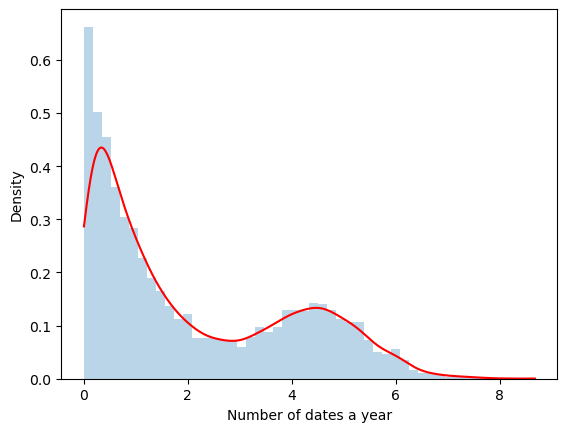

In [90]:
def gaussian_kernel(m, s, x):
    return np.exp(-0.5 * ((x - m) / s)**2) / (s * np.sqrt(2 * np.pi))

n = len(data)
x = np.linspace(0, max(data), 1000)

def kde(x):
    bandwidth = 0.25
    kde_vals = 0

    for i in range(n):
        d = data[i]
        kde_vals += gaussian_kernel(d, bandwidth, x)
    kde_vals /= n
    return kde_vals

p_1 = kde(x) # get p_1

# plotting against the histogram
plt.hist(data, bins=50, density=True, alpha=0.3)
plt.plot(x, p_1, color='red')
plt.xlabel('Number of dates a year')
plt.ylabel('Density')
plt.show()


In [91]:
# get the probability of having more than 2 dates a year
probability, error = quad(kde, 2, 1000)

print(f'Probability of going on more than 2 dates: {probability}')

Probability of going on more than 2 dates: 0.4018654208959674


One possible reason the distribution is like this is that there are two main groups of people. The data seems concentrated around 0-2 dates and 4-6 dats, which implies that in general, people will either go on very few dates or a more moderate amount of dates. It is less common for people to be somewhere in the middle. 

# Part 2    



In [92]:
two_k_samples = np.random.choice(data, size=2000)

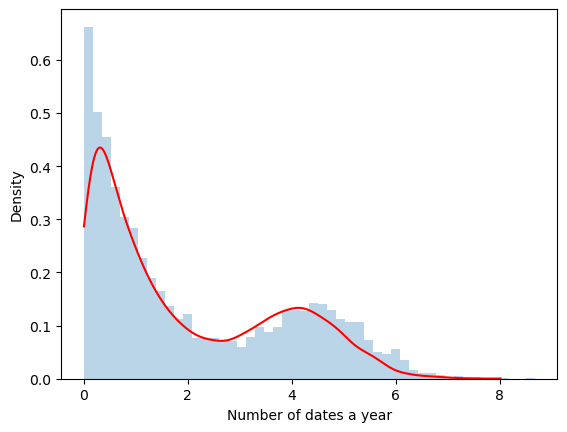

In [93]:
n = len(two_k_samples)
x = np.linspace(0, max(two_k_samples), 1000)

def kde_2k(x):
    bandwidth = 0.3
    kde_vals = 0

    for i in range(n):
        d = two_k_samples[i]
        kde_vals += gaussian_kernel(d, bandwidth, x)
    kde_vals /= n
    return kde_vals

p_2 = kde_2k(x) # get p_2

# plotting against the histogram
plt.hist(data, bins=50, density=True, alpha=0.3)
plt.plot(x, p_1, color='red')
plt.xlabel('Number of dates a year')
plt.ylabel('Density')
plt.show()

In [94]:
# get the probability of having more than 2 dates a year (with the 2k samples)
probability, error = quad(kde_2k, 2, 1000)

print(f'Probability of going on more than 2 dates: {probability}')

Probability of going on more than 2 dates: 0.3883853805220125
